# HW 1
# 1.

In [7]:
import numpy as np
import sklearn

def F(x):
    return 1./2.*np.linalg.norm(np.dot(A,x)-y)**2. + lamb*np.linalg.norm(x,ord=np.inf)

def F_prime(x):
    return np.dot(A.T, np.dot(A,x)-y)

def F_subgradient(x):
    return np.dot(A.T, np.dot(A,x)-y) + lamb * np.sign(x)

def F_subgradient_coord(x,coord):
    return np.dot(A[:,coord], np.dot(A,x)-y) + lamb * np.sign(x[coord])

def S(y, beta):
    ret = np.zeros(y.shape)
    for i in range(len(y)):
        if np.abs(y[i]) >= beta:
            ret[i] = y[i] - np.sign(y[i])*beta
    return ret

A = np.random.normal(scale=1,size=(2000,1000))
x_true = np.zeros(1000)
x_true[np.random.choice(1000, 100, replace=False)] = np.random.normal(scale=1,size=100)
z = np.random.normal(scale=.1,size=2000)
y = np.dot(A,x_true) + z
x_0 = np.random.normal(scale=1,size=1000)
step_size_constant = True  # backtrack search otherwise

lamb = 100.

# a) Subgradient Descent

In [8]:
x = np.copy(x_0)
print 'start obj',F(x)

if not step_size_constant:
    step_size = .05
else:
    alpha = .0001

Subgrad_error = []
for count in range(100):
    if not step_size_constant:
        step_size *= 8
        while F(x) < F(x - step_size * F_prime(x)):
            step_size = step_size/2
    else:
        step_size = alpha/(count+1)
    x = x - step_size * F_subgradient(x)
    Subgrad_error.append(F(x))
    
print 'end obj',F(x)
print 'true obj',F(x_true)

from sklearn import linear_model
p= linear_model.LinearRegression(fit_intercept=False).fit(A, y)
print 'sklearn obj',F(p.coef_)

print len(x[np.abs(x)>0])


start obj 1029154.96167
end obj 101223.3346
true obj 241.130611944
sklearn obj 236.335206938
1000


# b) ISTA

In [9]:
x = np.copy(x_0)

print 'start obj',F(x)

if not step_size_constant:
    step_size = .001
else:
    step_size = .0001

steps = []
ISTA_error = []
for count in range(100):
    if not step_size_constant:
        step_size *= 8
        while F(x) < F(S(x - step_size*F_prime(x), step_size*lamb)):
            step_size = step_size/2
        steps.append(step_size)
    x = S(x - step_size*F_prime(x), step_size*lamb)
    ISTA_error.append(F(x))

# print steps
# print np.average(steps)
print 'end obj',F(x)
print 'true obj',F(x_true)

from sklearn import linear_model
p = linear_model.LinearRegression(fit_intercept=False).fit(A, y)
print 'sklearn obj',F(p.coef_)

print len(x[np.abs(x)>0])


start obj 1029154.96167
end obj 514.067970803
true obj 241.130611944
sklearn obj 236.335206938
98


# c) FISTA

In [10]:
x = np.copy(x_0)
z = x
print 'start obj',F(x)

if not step_size_constant:
    step_size = .001
else:
    step_size = .0001

steps = []
FISTA_error = []
for count in range(100):
    if not step_size_constant:
        step_size *= 8
        while F(x) < F(S(z - step_size*F_prime(z), step_size*lamb)):
            step_size = step_size/2
        steps.append(step_size)
    x_old = x
    x = S(z - step_size*F_prime(z), step_size*lamb)
    z = x + count/(count+3)*(x - x_old)
    FISTA_error.append(F(x))

# print steps
# print np.average(steps)
print 'end obj',F(x)
print 'true obj',F(x_true)

from sklearn import linear_model
p = linear_model.LinearRegression(fit_intercept=False).fit(A, y)
print 'sklearn obj',F(p.coef_)

print len(x[np.abs(x)>0])


start obj 1029154.96167
end obj 514.067970803
true obj 241.130611944
sklearn obj 236.335206938
98


# d) Coordinate Descent

In [11]:
x = np.copy(x_0)
z = x
print 'start obj',F(x)

if not step_size_constant:
    step_size = .01
else:
    step_size = .0001

steps = []
Coord_error = []
for count in range(100):
    for coord in range(len(x)):
        if not step_size_constant:
            step_size *= 8
            x_temp = np.copy(x)
            x_temp[coord] = x[coord] - step_size * np.dot(A[:,coord], np.dot(A,x)-y)
            while F(x) < F(x_temp):
                step_size = step_size/2
                x_temp[coord] = x[coord] - step_size * np.dot(A[:,coord], np.dot(A,x)-y)
            steps.append(step_size)
            
            x[coord] = x[coord] - step_size * np.dot(A[:,coord], np.dot(A,x)-y)
            
        else:
            x[coord] = x[coord] - step_size * F_subgradient_coord(x,coord)
            
#         print F(x)
    Coord_error.append(F(x))

# print np.average(steps)
print 'end obj',F(x)
print 'true obj',F(x_true)

from sklearn import linear_model
p = linear_model.LinearRegression(fit_intercept=False).fit(A, y)
print 'sklearn obj',F(p.coef_)

print len(x[np.abs(x)>0])


start obj 1029154.96167
end obj 548.003215784
true obj 241.130611944
sklearn obj 236.335206938
1000


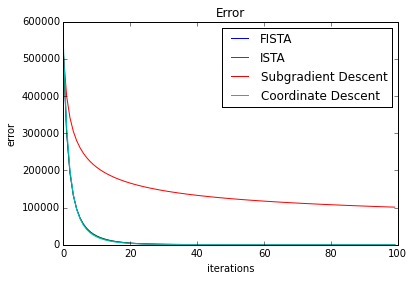

In [12]:
%matplotlib inline
import matplotlib.pyplot as plt

fista, = plt.plot(range(100), FISTA_error)
ista, = plt.plot(range(100), ISTA_error)
subgrad, = plt.plot(range(100), Subgrad_error)
coord, = plt.plot(range(100), Coord_error)

plt.legend([fista, ista, subgrad, coord], ["FISTA", "ISTA", "Subgradient Descent", "Coordinate Descent"])

plt.title('Error')
plt.xlabel('iterations')
plt.ylabel('error')


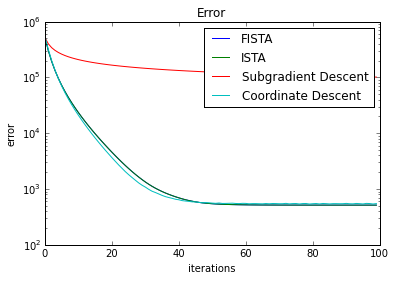

In [14]:
%matplotlib inline
import matplotlib.pyplot  as pyplot

ax = plt.subplot(1, 1, 1)
ax.set_yscale('log')

fista, = plt.plot(range(100), FISTA_error)
ista, = plt.plot(range(100), ISTA_error)
subgrad, = plt.plot(range(100), Subgrad_error)
coord, = plt.plot(range(100), Coord_error)

plt.legend([fista, ista, subgrad, coord], ["FISTA", "ISTA", "Subgradient Descent", "Coordinate Descent"])

plt.title('Error')
plt.xlabel('iterations')
plt.ylabel('error')


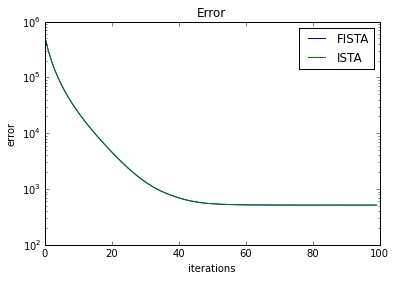

In [15]:
%matplotlib inline
import matplotlib.pyplot  as pyplot

ax = plt.subplot(1, 1, 1)
ax.set_yscale('log')

fista, = plt.plot(range(100), FISTA_error)
ista, = plt.plot(range(100), ISTA_error)

plt.legend([fista, ista], ["FISTA", "ISTA"])

plt.title('Error')
plt.xlabel('iterations')
plt.ylabel('error')


We see the ISTA and FISTA methods have a very similiar convergence rates. The subgradient method converges very slow with $\frac{\alpha}{k}$ step sizes. The coordinate method converges similar to ISTA/FISTA but takes much more computation (factor of length of x).

# 2.

<img src="Signal.png">
<img src="ignoring_noise.png">

# a) tv_denoising.m

    function est = tv_denoising(F, data, n, lambda)

    cvx_begin  
        variable est(n,1);
        minimize( pow_pos(norm(F*est - data, 2),2) ...
            + lambda * norm(est(1:n-1)-est(2:n),1))
    cvx_end

We observe that as lambda gets small, ex. $\texttt{lambda} = 10^{-5}$, we converge to the least squares minimum which is just $F^{-1}\texttt{data}$.
<img src="small_lambda.png">


As lambda grows large, ex. $\texttt{lambda} = 10^{5}$, we converge to a flat line with $\texttt{TV(est)} = 0$.
<img src="large_lambda.png">


When lambda is at some reasonable value, ex. $\texttt{lambda} = 1.0$, then we approximately reconstruct the signal.
<img src="medium_lambda.png">


# b) min_norm_estimate.m

    function est = min_norm_estimate(F, data, n)

    cvx_begin  
        variable est(n,1) complex;
        minimize( norm(est, 2) )
        subject to
            F*est == data;
    cvx_end

We observe that the estimate looks nothing like the signal. This is not too surprising since we have an underdetermined problem and there are infinite solutions.

<img src="reg_under_l2.png">


# c)

From $ Fx = y $ we break $F$ and $x$ into components.
$$ [F F] [x_1 x_2]^T = y $$
Then
$$ F x_1 + F x_2 = y $$
$$ F (x_1 + x_2) = y $$
$$ x_1 + x_2 = F^{-1} y $$

This tells us that $x_1 + x_2$ is determined. The only freedom is the weight between $x_1$ and $x_2$. So minimizing $\|x\|_2$ will just let $x_1 = x_2$.

# d) min_tv_estimate.m

    function est = min_tv_estimate(F, data, n)

    cvx_begin  
        variable est(n,1) complex;
        minimize( norm(est(1:n-1)-est(2:n),1) )
        subject to
            F*est == data;
    cvx_end

If we are to change the objective function to minimize $\texttt{TV}(x)$ then the local minimum might be reached where $x_{1_{\texttt{last}}} = x_{2_{\texttt{first}}}$. A smaller minimum is where $x_1$ or $x_2$ equals $0$. This still does not do well at constructing the signal.

<img src="reg_under_tv.png">


# e)

We note that the randomly undersampled Fourier transform matrix likely doesn't have duplicate columns. This leaves an under-determined problem. Minimizing different objectives gives very different results. But minimizing $\texttt{TV}(x)$ gives a good approximation of the signal.

<img src="rand_under_l2.png">

<img src="rand_under_tv.png">
